In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# datasets
trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)


In [4]:
# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [5]:

# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir`is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

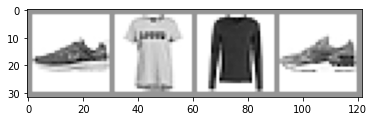

In [10]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

In [ ]:
! tensorboard --logdir=runs

/Users/kangke/anaconda3/envs/NLP_conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kangke/anaconda3/envs/NLP_conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kangke/anaconda3/envs/NLP_conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kangke

I0918 11:24:09.908527 123145541890048 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:24:09] "GET /data/environment HTTP/1.1" 200 -
I0918 11:24:09.909294 123145526124544 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:24:09] "GET /data/experiments HTTP/1.1" 200 -
I0918 11:24:09.910799 123145536634880 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:24:09] "GET /data/runs HTTP/1.1" 200 -
I0918 11:24:09.911399 123145520869376 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:24:09] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 11:24:09.919144 123145520869376 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:24:09] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 11:24:09.922152 123145520869376 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:24:09] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 11:24:42.433331 123145526124544 _internal.py:113] ::ffff:10

I0918 11:29:10.907104 123145536634880 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:29:10] "GET /data/runs HTTP/1.1" 200 -
I0918 11:29:10.907312 123145520869376 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:29:10] "GET /data/environment HTTP/1.1" 200 -
I0918 11:29:10.907990 123145526124544 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:29:10] "GET /data/experiments HTTP/1.1" 200 -
I0918 11:29:10.909984 123145541890048 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:29:10] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 11:29:10.916018 123145541890048 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:29:10] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 11:29:10.918605 123145541890048 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:29:10] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 11:29:41.906194 123145520869376 _internal.py:113] ::ffff:10

I0918 11:33:27.427674 123145536634880 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:33:27] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 11:33:27.430765 123145536634880 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:33:27] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 11:33:57.905399 123145520869376 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:33:57] "GET /data/environment HTTP/1.1" 200 -
I0918 11:33:57.905597 123145541890048 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:33:57] "GET /data/experiments HTTP/1.1" 200 -
I0918 11:33:57.905936 123145526124544 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:33:57] "GET /data/runs HTTP/1.1" 200 -
I0918 11:33:57.907258 123145536634880 _internal.py:113] ::ffff:10.0.148.189 - - [18/Sep/2020 11:33:57] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 11:33:57.912449 123145536634880 _internal.py:113] ::ffff:10

I0918 11:38:37.904973 123145557655552 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:38:37] "GET /data/environment HTTP/1.1" 200 -
I0918 11:38:37.907471 123145557655552 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:38:37] "GET /data/runs HTTP/1.1" 200 -
I0918 11:38:37.908224 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:38:37] "GET /data/experiments HTTP/1.1" 200 -
I0918 11:38:37.908698 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:38:37] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 11:38:37.915556 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:38:37] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 11:38:37.918091 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:38:37] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 11:39:09.710268 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 11:43:24.610698 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:43:24] "GET /data/environment HTTP/1.1" 200 -
I0918 11:43:24.611030 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:43:24] "GET /data/experiments HTTP/1.1" 200 -
I0918 11:43:24.611879 123145557655552 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:43:24] "GET /data/runs HTTP/1.1" 200 -
I0918 11:43:24.613530 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:43:24] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 11:43:24.622501 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:43:24] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 11:43:24.625153 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:43:24] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 11:44:08.808781 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 11:48:25.904227 123145557655552 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:48:25] "GET /data/runs HTTP/1.1" 200 -
I0918 11:48:25.904513 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:48:25] "GET /data/environment HTTP/1.1" 200 -
I0918 11:48:25.905289 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:48:25] "GET /data/experiments HTTP/1.1" 200 -
I0918 11:48:25.905758 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:48:25] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 11:48:25.913789 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:48:25] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 11:48:25.916846 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:48:25] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 11:48:56.905452 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 11:53:28.903204 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:53:28] "GET /data/environment HTTP/1.1" 200 -
I0918 11:53:28.904240 123145557655552 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:53:28] "GET /data/experiments HTTP/1.1" 200 -
I0918 11:53:28.905565 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:53:28] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 11:53:28.906732 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:53:28] "GET /data/runs HTTP/1.1" 200 -
I0918 11:53:28.914710 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:53:28] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 11:53:28.918648 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:53:28] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 11:53:59.905205 123145557655552 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 11:58:41.729761 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:58:41] "GET /data/experiments HTTP/1.1" 200 -
I0918 11:58:41.730157 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:58:41] "GET /data/environment HTTP/1.1" 200 -
I0918 11:58:41.730966 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:58:41] "GET /data/runs HTTP/1.1" 200 -
I0918 11:58:41.732185 123145557655552 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:58:41] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 11:58:41.738298 123145557655552 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:58:41] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 11:58:41.740808 123145557655552 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 11:58:41] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 11:59:12.191263 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 14:40:23.797765 123145547145216 _internal.py:113] ::1 - - [18/Sep/2020 14:40:23] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 14:40:23.800966 123145547145216 _internal.py:113] ::1 - - [18/Sep/2020 14:40:23] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 14:40:54.525261 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:40:54] "GET /data/environment HTTP/1.1" 200 -
I0918 14:40:54.527889 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:40:54] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 14:40:54.529221 123145557655552 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:40:54] "GET /data/runs HTTP/1.1" 200 -
I0918 14:40:54.529761 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:40:54] "GET /data/experiments HTTP/1.1" 200 -
I0918 14:40:54.533813 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:40:54] "GET /dat

I0918 14:45:02.526346 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:45:02] "GET /data/experiments HTTP/1.1" 200 -
I0918 14:45:02.526664 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:45:02] "GET /data/runs HTTP/1.1" 200 -
I0918 14:45:02.527219 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:45:02] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 14:45:02.533619 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:45:02] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 14:45:02.536565 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:45:02] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 14:45:33.524230 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:45:33] "GET /data/experiments HTTP/1.1" 200 -
I0918 14:45:33.524909 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 14:49:14.534039 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:49:14] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 14:49:45.522819 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:49:45] "GET /data/environment HTTP/1.1" 200 -
I0918 14:49:45.523142 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:49:45] "GET /data/runs HTTP/1.1" 200 -
I0918 14:49:45.524669 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:49:45] "GET /data/experiments HTTP/1.1" 200 -
I0918 14:49:45.525102 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:49:45] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 14:49:45.531236 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:49:45] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 14:49:45.534018 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 14:54:25.521019 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:54:25] "GET /data/experiments HTTP/1.1" 200 -
I0918 14:54:25.522128 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:54:25] "GET /data/environment HTTP/1.1" 200 -
I0918 14:54:25.522510 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:54:25] "GET /data/runs HTTP/1.1" 200 -
I0918 14:54:25.523983 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:54:25] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 14:54:25.529186 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:54:25] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 14:54:25.531734 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:54:25] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 14:54:56.521184 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 14:59:06.779520 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:59:06] "GET /data/runs HTTP/1.1" 200 -
I0918 14:59:06.781012 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:59:06] "GET /data/experiments HTTP/1.1" 200 -
I0918 14:59:06.781311 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:59:06] "GET /data/environment HTTP/1.1" 200 -
I0918 14:59:06.782770 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:59:06] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 14:59:06.788599 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:59:06] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 14:59:06.791300 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 14:59:06] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 14:59:37.520186 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 15:03:45.517931 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:03:45] "GET /data/environment HTTP/1.1" 200 -
I0918 15:03:45.518591 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:03:45] "GET /data/runs HTTP/1.1" 200 -
I0918 15:03:45.519204 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:03:45] "GET /data/experiments HTTP/1.1" 200 -
I0918 15:03:45.520800 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:03:45] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 15:03:45.526968 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:03:45] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 15:03:45.529626 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:03:45] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 15:04:16.517834 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 15:08:24.516052 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:08:24] "GET /data/runs HTTP/1.1" 200 -
I0918 15:08:24.516775 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:08:24] "GET /data/experiments HTTP/1.1" 200 -
I0918 15:08:24.518801 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:08:24] "GET /data/environment HTTP/1.1" 200 -
I0918 15:08:24.519083 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:08:24] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 15:08:24.524832 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:08:24] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 15:08:24.527407 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:08:24] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 15:08:56.217727 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 15:13:03.522701 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:13:03] "GET /data/experiments HTTP/1.1" 200 -
I0918 15:13:03.523010 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:13:03] "GET /data/runs HTTP/1.1" 200 -
I0918 15:13:03.523474 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:13:03] "GET /data/environment HTTP/1.1" 200 -
I0918 15:13:03.525321 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:13:03] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 15:13:03.530592 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:13:03] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 15:13:03.533164 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:13:03] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 15:13:34.522342 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 15:17:56.774757 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:17:56] "GET /data/experiments HTTP/1.1" 200 -
I0918 15:17:56.776514 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:17:56] "GET /data/environment HTTP/1.1" 200 -
I0918 15:17:56.776796 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:17:56] "GET /data/runs HTTP/1.1" 200 -
I0918 15:17:56.777163 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:17:56] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 15:17:56.783769 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:17:56] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 15:17:56.786745 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:17:56] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 15:18:41.720634 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 15:22:24.530258 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:22:24] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 15:22:55.519280 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:22:55] "GET /data/runs HTTP/1.1" 200 -
I0918 15:22:55.520385 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:22:55] "GET /data/environment HTTP/1.1" 200 -
I0918 15:22:55.521553 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:22:55] "GET /data/experiments HTTP/1.1" 200 -
I0918 15:22:55.521988 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:22:55] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 15:22:55.528258 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:22:55] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 15:22:55.530864 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 15:27:34.518913 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:27:34] "GET /data/experiments HTTP/1.1" 200 -
I0918 15:27:34.519825 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:27:34] "GET /data/environment HTTP/1.1" 200 -
I0918 15:27:34.521554 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:27:34] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 15:27:34.522013 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:27:34] "GET /data/runs HTTP/1.1" 200 -
I0918 15:27:34.527719 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:27:34] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 15:27:34.530275 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:27:34] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 15:28:05.519658 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 15:32:27.518000 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:32:27] "GET /data/environment HTTP/1.1" 200 -
I0918 15:32:27.518739 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:32:27] "GET /data/experiments HTTP/1.1" 200 -
I0918 15:32:27.520853 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:32:27] "GET /data/runs HTTP/1.1" 200 -
I0918 15:32:27.521217 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:32:27] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 15:32:27.527040 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:32:27] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 15:32:27.529712 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:32:27] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 15:32:58.519885 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 15:37:09.838692 123145552400384 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:37:09] "GET /data/environment HTTP/1.1" 200 -
I0918 15:37:09.839967 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:37:09] "GET /data/runs HTTP/1.1" 200 -
I0918 15:37:09.840211 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:37:09] "GET /data/experiments HTTP/1.1" 200 -
I0918 15:37:09.841567 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:37:09] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 15:37:09.848037 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:37:09] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 15:37:09.850841 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:37:09] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 15:37:40.516149 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 15:41:17.523355 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:41:17] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 15:41:17.525978 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:41:17] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -
I0918 15:41:48.515180 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:41:48] "GET /data/runs HTTP/1.1" 200 -
I0918 15:41:48.515504 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:41:48] "GET /data/environment HTTP/1.1" 200 -
I0918 15:41:48.517402 123145557655552 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:41:48] "GET /data/experiments HTTP/1.1" 200 -
I0918 15:41:48.517862 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:41:48] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 15:41:48.523492 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Se

I0918 15:46:31.515962 123145557655552 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:46:31] "GET /data/experiments HTTP/1.1" 200 -
I0918 15:46:31.516901 123145547145216 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:46:31] "GET /data/runs HTTP/1.1" 200 -
I0918 15:46:31.517608 123145562910720 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:46:31] "GET /data/environment HTTP/1.1" 200 -
I0918 15:46:31.519077 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:46:31] "GET /data/plugins_listing HTTP/1.1" 200 -
I0918 15:46:31.524399 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:46:31] "GET /data/plugin/images/tags HTTP/1.1" 200 -
I0918 15:46:31.528113 123145531379712 _internal.py:113] ::ffff:127.0.0.1 - - [18/Sep/2020 15:46:31] "GET /data/plugin/images/images?run=fashion_mnist_experiment_1&sample=0&tag=four_fashion_mnist_images HTTP/1.1" 200 -


In [ ]:
writer.add_graph(net, images)
writer.close()